In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.__version__

'0.25.1'

In [3]:
np.__version__

'1.17.2'

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [5]:
sklearn.__version__

'0.21.3'

### Heart Disease Data

In [6]:
data = pd.read_csv('./original.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


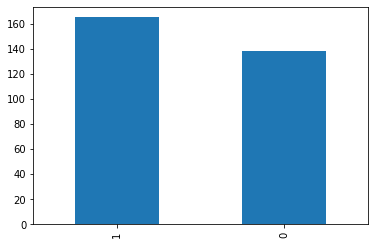

In [10]:
data.target.value_counts().plot(kind='bar')

In [8]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### list the items from the current folder

In [11]:
ls

 original.csv              'Pandas Cheatsheet _ Kaggle.pdf'   Pandas.ipynb
 pandas_cheat_sheet_1.pdf   Pandas_Cheat_Sheet.pdf


### Pandas Series

In [12]:
series = pd.Series(['BMW','Toyota', 'Mercedes'])
series

0         BMW
1      Toyota
2    Mercedes
dtype: object

In [13]:
series = pd.Series(['a','b','c'], index=[1,2,3])
series

1    a
2    b
3    c
dtype: object

In [14]:
series = pd.Series(['a','b','c'], index=[1,2,3,4])
series

ValueError: Length of passed values is 3, index implies 4

### DataFrame is 2D

In [15]:
df = pd.DataFrame({
    'car':['BMW','Mercedes','Toyota'],
    'color':['Yellow','Black','White']
},
index=['a','b','c'])
df

,car,color
a,BMW,Yellow
b,Mercedes,Black
c,Toyota,White


In [16]:
series.index

Int64Index([1, 2, 3], dtype='int64')

In [17]:
df.index

Index(['a', 'b', 'c'], dtype='object')

In [18]:
car_sales = pd.read_csv('./car-sales.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [19]:
car_sales.to_csv('exported-car-sales.csv')


In [20]:
car_sales_exported = pd.read_csv('./exported-car-sales.csv')
car_sales_exported.head()

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Toyota,White,150043,4,"$4,000.00"
1,1,Honda,Red,87899,4,"$5,000.00"
2,2,Toyota,Blue,32549,3,"$7,000.00"
3,3,BMW,Black,11179,5,"$22,000.00"
4,4,Nissan,White,213095,4,"$3,500.00"


### cheack the extra column above

In [22]:
car_sales.to_csv('exported-car-sales.csv', index=False)

In [23]:
car_sales_exported = pd.read_csv('./exported-car-sales.csv')
car_sales_exported.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


### the index column is gone

### Describing data

In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [25]:
car_sales.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


In [26]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [27]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [28]:
car_sales.shape

(10, 5)

In [29]:
car_sales.size

50

In [30]:
car_sales.info

<bound method DataFrame.info of      Make Colour  Odometer (KM)  Doors       Price
0  Toyota  White         150043      4   $4,000.00
1   Honda    Red          87899      4   $5,000.00
2  Toyota   Blue          32549      3   $7,000.00
3     BMW  Black          11179      5  $22,000.00
4  Nissan  White         213095      4   $3,500.00
5  Toyota  Green          99213      4   $4,500.00
6   Honda   Blue          45698      4   $7,500.00
7   Honda   Blue          54738      4   $7,000.00
8  Toyota  White          60000      4   $6,250.00
9  Nissan  White          31600      4   $9,700.00>

In [31]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


### integer calues are described and not the object values

In [32]:
car_sales.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [33]:
car_sales.sum()

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

In [36]:
car_sales['Doors'].sum()

40

In [37]:
car_sales['Price'].sum()

'$4,000.00$5,000.00$7,000.00$22,000.00$3,500.00$4,500.00$7,500.00$7,000.00$6,250.00$9,700.00'

In [39]:
car_sales['Odometer (KM)'].sum()

786014

## Viewing and Selecting Data

In [40]:
car_sales.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


### loc vs iloc

In [41]:
animals = pd.Series(['cat','dog','pigeon','panda'])
animals

0       cat
1       dog
2    pigeon
3     panda
dtype: object

In [42]:
animals = pd.Series(['cat','dog','pigeon','panda','snake'], index=[0,3,6,9,2])
animals

0       cat
3       dog
6    pigeon
9     panda
2     snake
dtype: object

In [43]:
animals.loc[3]

'dog'

In [44]:
animals.loc[4]

KeyError: 4

In [45]:
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

### iloc

In [46]:
animals.iloc[3]

'panda'

In [47]:
animals

0       cat
3       dog
6    pigeon
9     panda
2     snake
dtype: object

### 3 is the 4th row, so pandas is printed

In [48]:
animals.iloc[5]

IndexError: single positional indexer is out-of-bounds

In [49]:
animals.iloc[:2]

0    cat
3    dog
dtype: object

In [53]:
animals

0       cat
3       dog
6    pigeon
9     panda
2     snake
dtype: object

### using iloc 2, will print till 2nd label index

In [55]:
animals.loc[:2]

0       cat
3       dog
6    pigeon
9     panda
2     snake
dtype: object

In [56]:
animals.loc[:3]

0    cat
3    dog
dtype: object

In [58]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [59]:
car_sales[car_sales['Make'] == 'Honda']

,Make,Colour,Odometer (KM),Doors,Price
1,Honda,Red,87899,4,"$5,000.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"


### using cross tab to compare columns

In [61]:
pd.crosstab(car_sales['Make'], car_sales['Doors'])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


### groupby when you want to compare more than 2 columns

In [64]:
car_sales.groupby(['Make']).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


In [70]:
car_sales.groupby(['Colour'])

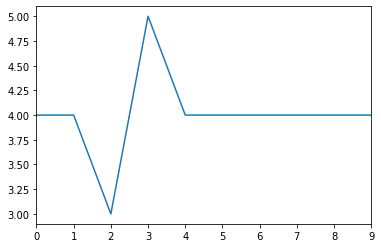

In [71]:
car_sales['Doors'].plot()

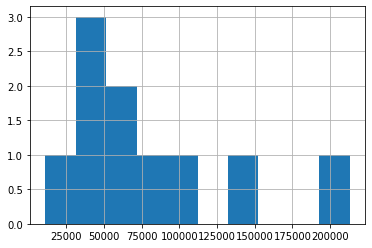

In [72]:
car_sales['Odometer (KM)'].hist()

## converting object column to type int

In [73]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [74]:
car_sales['Price']

0     $4,000.00
1     $5,000.00
2     $7,000.00
3    $22,000.00
4     $3,500.00
5     $4,500.00
6     $7,500.00
7     $7,000.00
8     $6,250.00
9     $9,700.00
Name: Price, dtype: object

## without regex, converting to int column

In [75]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]','').astype(int)

In [76]:
car_sales['Price']

0     400000
1     500000
2     700000
3    2200000
4     350000
5     450000
6     750000
7     700000
8     625000
9     970000
Name: Price, dtype: int64

In [77]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

## converting to int column with regex

In [78]:
car_sales['Price'] = car_sales['Price'].replace('[\$\,\.]','', regex=True).astype(int)

In [79]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


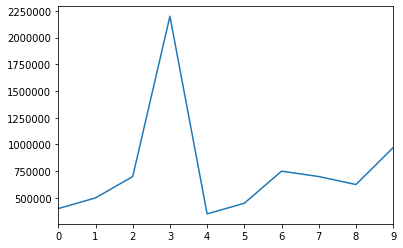

In [80]:
car_sales['Price'].plot()

In [81]:
car_sales['Price']

0     400000
1     500000
2     700000
3    2200000
4     350000
5     450000
6     750000
7     700000
8     625000
9     970000
Name: Price, dtype: int64

In [82]:
car_sales['Price'] = car_sales['Price'][:-2]

In [83]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000.0
1,Honda,Red,87899,4,500000.0
2,Toyota,Blue,32549,3,700000.0
3,BMW,Black,11179,5,2200000.0
4,Nissan,White,213095,4,350000.0
5,Toyota,Green,99213,4,450000.0
6,Honda,Blue,45698,4,750000.0
7,Honda,Blue,54738,4,700000.0
8,Toyota,White,60000,4,NaN
9,Nissan,White,31600,4,NaN


In [84]:
car_sales['Price']

0     400000.0
1     500000.0
2     700000.0
3    2200000.0
4     350000.0
5     450000.0
6     750000.0
7     700000.0
8          NaN
9          NaN
Name: Price, dtype: float64